Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
# Load data
data = pd.read_csv('WineQT.csv')

Data Cleaning and Preprocessing

In [3]:
# Check basic statistics and data types
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB
None
       fixed acidity  volatile acidity  citric acid  residual sugar  \

In [4]:
# Replace spaces with underscores in column names for easier analysis
data.columns = [col.replace(' ', '_') for col in data.columns]

In [5]:
# Dropping the 'Id' column as it's just an identifier
data = data.drop(columns='Id')

In [6]:
# Handling outliers by capping at the 95th percentile
columns_to_check = ['residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide']
for column in columns_to_check:
    percentile_95 = data[column].quantile(0.95)
    data[column] = data[column].clip(upper=percentile_95)

Exploratory Data Analysis (EDA)

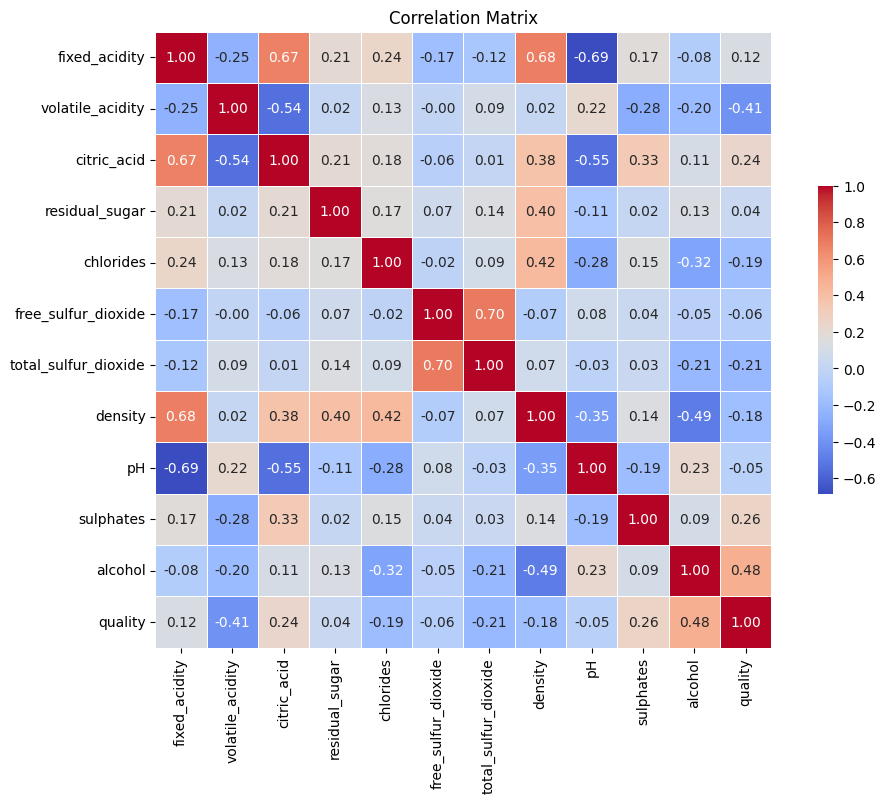

In [7]:
# Correlation Analysis
corr = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Matrix')
plt.show()

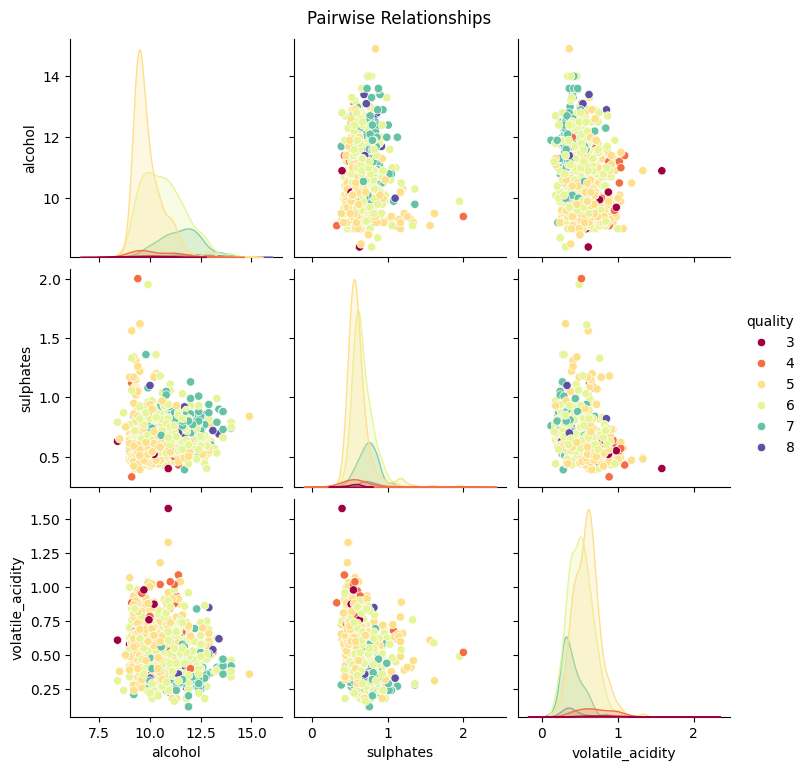

In [8]:
# Pairwise Relationships
selected_features = ['alcohol', 'sulphates', 'volatile_acidity', 'quality']
sns.pairplot(data[selected_features], kind="scatter", hue="quality", palette="Spectral")
plt.suptitle('Pairwise Relationships', y=1.02)
plt.show()

C:\Users\ovira\AppData\Local\Temp\ipykernel_29848\3731021617.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=data, palette="viridis")


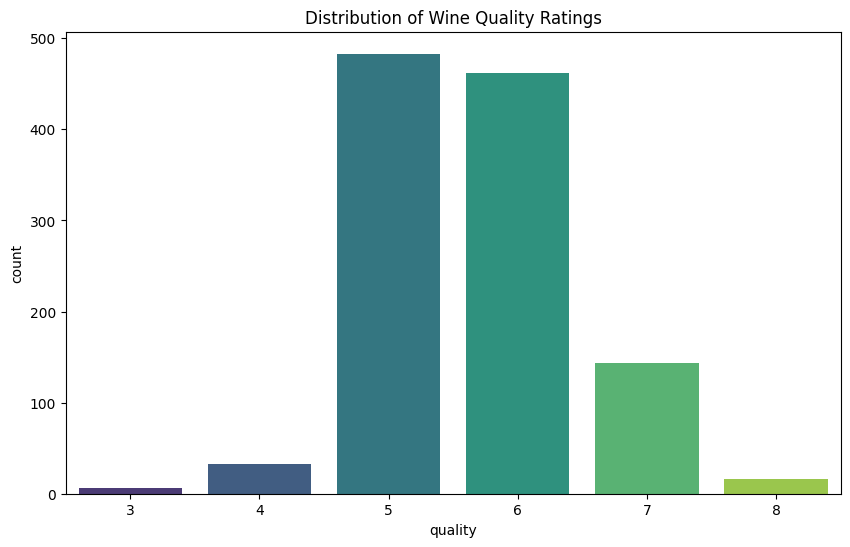

In [9]:
# Quality Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='quality', data=data, palette="viridis")
plt.title('Distribution of Wine Quality Ratings')
plt.show()

Statistical Analysis

In [10]:
# ANOVA for 'alcohol', 'sulphates', and 'volatile_acidity'
anova_results = {}
for feature in ['alcohol', 'sulphates', 'volatile_acidity']:
    model = ols(f'{feature} ~ C(quality)', data=data).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    anova_results[feature] = anova_table
    print(f"ANOVA results for {feature}:\n", anova_table, "\n")

ANOVA results for alcohol:
                 sum_sq      df          F        PR(>F)
C(quality)  356.830967     5.0  82.747058  3.399896e-74
Residual    980.619293  1137.0        NaN           NaN 

ANOVA results for sulphates:
                sum_sq      df          F        PR(>F)
C(quality)   2.438329     5.0  18.049074  2.926057e-17
Residual    30.720466  1137.0        NaN           NaN 

ANOVA results for volatile_acidity:
                sum_sq      df          F        PR(>F)
C(quality)   6.415831     5.0  47.937979  4.446443e-45
Residual    30.434321  1137.0        NaN           NaN 



In [11]:
# Tukey's HSD Test for 'alcohol', 'sulphates', and 'volatile_acidity'
tukey_results = {}
for feature in ['alcohol', 'sulphates', 'volatile_acidity']:
    tukey = pairwise_tukeyhsd(endog=data[feature], groups=data['quality'], alpha=0.05)
    tukey_results[feature] = tukey
    print(f"Tukey's HSD test results for {feature}:\n", tukey.summary(), "\n")


Tukey's HSD test results for alcohol:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     3      4   0.5689 0.7389 -0.6076 1.7455  False
     3      5   0.2106 0.9939 -0.8784 1.2996  False
     3      6   0.9637 0.1176 -0.1256  2.053  False
     3      7    1.791 0.0001  0.6862 2.8957   True
     3      8   2.2458    0.0  0.9768 3.5149   True
     4      5  -0.3583 0.2652 -0.8353 0.1187  False
     4      6   0.3947 0.1718 -0.0829 0.8724  False
     4      7    1.222    0.0  0.7101  1.734   True
     4      8   1.6769    0.0  0.8693 2.4845   True
     5      6   0.7531    0.0  0.5805 0.9256   True
     5      7   1.5804    0.0   1.328 1.8327   True
     5      8   2.0352    0.0  1.3616 2.7089   True
     6      7   0.8273    0.0  0.5736  1.081   True
     6      8   1.2822    0.0   0.608 1.9563   True
     7      8   0.4549 0.4289  -0.244 1.1537  False
-------------------------